Contexte

AllLife Bank est une banque américaine avec une base de clients en croissance. La majorité de ces clients sont des clients passifs (détenteurs de dépôts) avec des montants de dépôts variés. Le nombre de clients qui sont également emprunteurs (clients actifs) est assez faible, et la banque souhaite rapidement élargir cette base pour augmenter son activité de prêts et ainsi gagner davantage grâce aux intérêts des prêts. En particulier, la direction souhaite explorer des moyens de convertir ses clients passifs en clients de prêts personnels (tout en les conservant comme déposants).

Une campagne menée par la banque l’année dernière auprès des clients passifs a montré un taux de conversion satisfaisant, avec un succès de plus de 9 %. Cela a encouragé le département de marketing de détail à concevoir des campagnes avec un ciblage plus précis pour augmenter le taux de réussite.

En tant que data scientist chez AllLife Bank, vous devez construire un modèle qui aidera le département marketing à identifier les clients potentiels ayant une probabilité plus élevée de souscrire un prêt.

Objectif

	1.	Prédire si un client passif souscrira un prêt personnel ou non.
	2.	Identifier les variables les plus significatives.
	3.	Déterminer le segment de clients à cibler davantage.

Jeu de données

	•	ID : Identifiant du client
	•	Age : Âge du client en années complètes
	•	Experience : Nombre d’années d’expérience professionnelle
	•	Income : Revenu annuel du client (en milliers de dollars)
	•	ZIP Code : Code postal de l’adresse du domicile
	•	Family : Taille de la famille du client
	•	CCAvg : Dépenses moyennes mensuelles avec les cartes de crédit (en milliers de dollars)
	•	Education : Niveau d’éducation. 1 : Licence ; 2 : Diplôme universitaire ; 3 : Avancé/Professionnel
	•	Mortgage : Valeur de l’hypothèque de la maison, le cas échéant (en milliers de dollars)
	•	Personal_Loan : Ce client a-t-il accepté le prêt personnel proposé lors de la dernière campagne ?
	•	Securities_Account : Le client possède-t-il un compte de titres auprès de la banque ?
	•	CD_Account : Le client possède-t-il un compte de dépôt à terme (CD) auprès de la banque ?
	•	Online : Le client utilise-t-il les services de banque en ligne ?
	•	CreditCard : Le client utilise-t-il une carte de crédit émise par une autre banque (à l’exclusion de AllLife Bank) ?

### Import necessary libraries

In [41]:
# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

#!pip install sklearn

# To get diferent metric scores
import sklearn.metrics as metrics

### Lire le jeu de données

In [42]:
loan = pd.read_csv('/content/Loan_Modelling - Loan_Modelling.csv')

### Afficher les 5 premières et 5 dernières lignes du jeu de données.

Afficher les 5 premières

In [ ]:
#todo
loan.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Afficher les 5 dernières lignes

In [ ]:
loan.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


### Comprendre la forme du jeu de données.

In [ ]:
#todo

### Vérifions les données dupliquées. Et s’il y en a, nous devrions les supprimer.



In [ ]:
#todo
loan.duplicated().sum()

0

Y a-t-il des valeurs dupliquées ? #todo

***Je ne remarque aucune données dupliqué***

### Vérifiez les types de données des colonnes du jeu de données.

In [ ]:
#todo
loan.dtypes

,0
ID,int64
Age,int64
Experience,int64
Income,int64
ZIPCode,int64
Family,int64
CCAvg,float64
Education,int64
Mortgage,int64
Personal_Loan,int64


Quels sont les types de données ? #todo

***Ce sont des variables numériques à majorité entières. Seul les dépenses moyennes du client (CCAvg) sont de type float.***

### Vérifiez les valeurs manquantes.

In [ ]:
#todo
loan.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


* Valeurs manquantes ? #todo

***On ne remarque aucune valeur manquante parmi ce jeu de données.***

### Summary of the dataset

Use .describe() function

Describe the table after


In [ ]:
#todo
loan.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


* Commentez #todo


***Commentaire = La Fonction describe(), expose un résumé statistiques du jeu de données, en mettant en avant les fonctions count(), mean(), std(), min(), max(), 25% (), 50% (), 75% (). C'est très utile pour effectuer des statistiques sur des données.***

### EDA : Écrivez deux fonctions en Python qui crée un histogramme et un boxplot  pour une colonne spécifique d’un DataFrame.

### Observations on Age


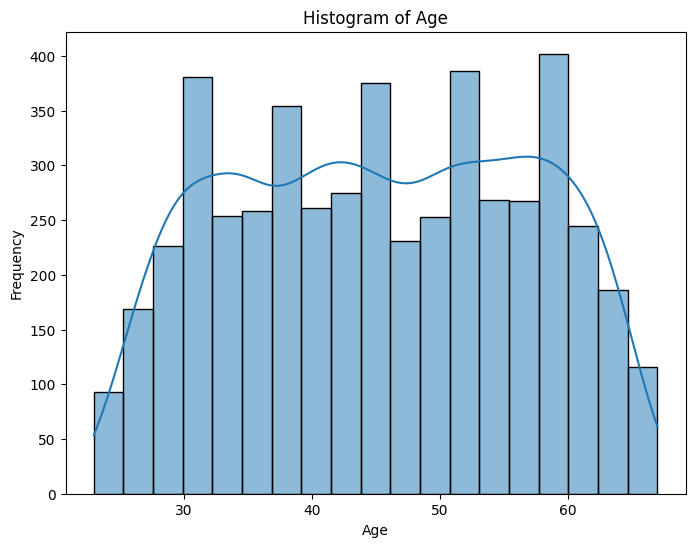

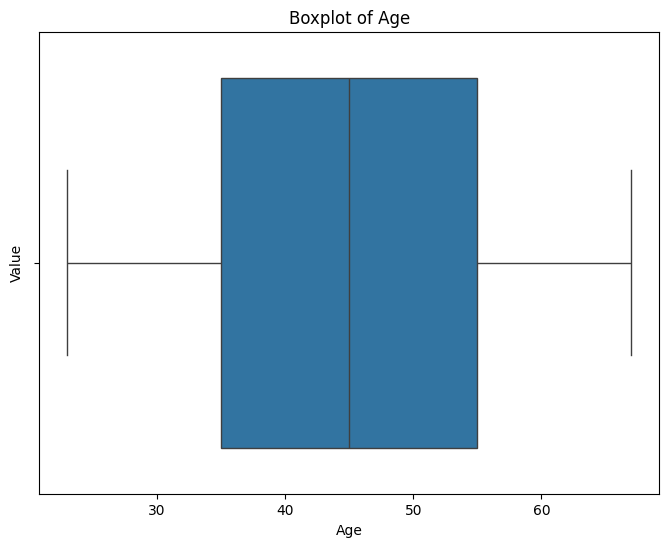

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def function_name(df, column):
    # Create a histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
function_name(loan, 'Age')
plt.show()

def function_name(df, column):
    # Create a boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Value')
function_name(loan, 'Age')
plt.show()

***Commentaire Histogramme =
L'Histogramme ici montre la répartition des âges entre les 5000 individus. On peut analyser ici que la plupart des clients ont une tranche d'âge situé entre 30 et 60 ans. Ici on ne voit pas de valeurs extrèmes faibles ou élevés.***



***Commentaire BoxPlot = Le BoxPlot ici nous en dit plus sur certaines statistiques (médiane, quartiles 25%, 50%, Âge minimum, Âge maximum) de ce jeu de données. En effet, on peut voir que l'âge median ici est de 45 ans. Que l'âge maximum est d'environ de 65 ans tandis que l'âge minimum est d'environ de 25 environ. En résumé, ce boxplot nous expose la dispersion des âges et leur répartition autour de la médiane, avec aucune valeur êtreme***

### Observations on Experience

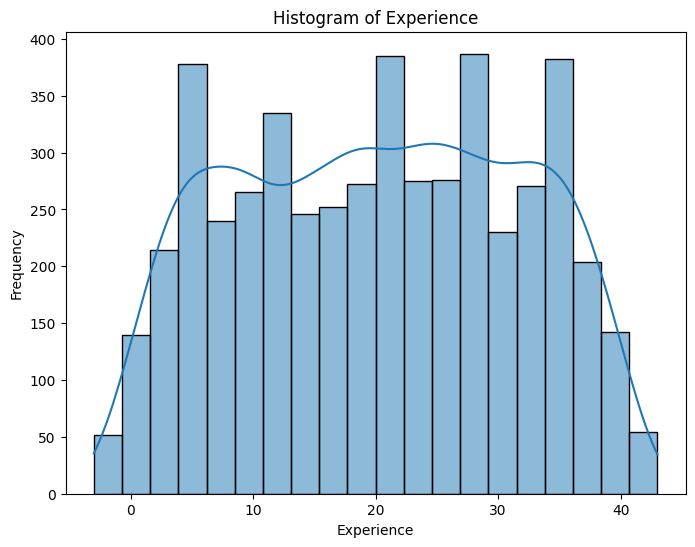

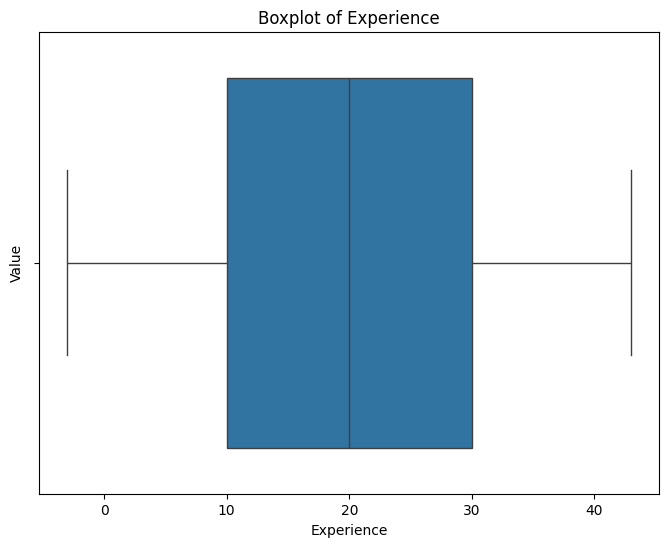

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def function_name(df, column):
    # Create a histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
function_name(loan, 'Experience')
plt.show()

def function_name(df, column):
    # Create a boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Value')
function_name(loan, 'Experience')
plt.show()

commentez : #todo

***Commentaire Histogramme =
L'Histogramme ici montre la répartition de L'expérience entre les 5000 individus. On peut analyser ici que les plus grosses fréquences d'expérience situent entre 5 et 35 ans environ. Dans ces environs là, la variation est plutôt homogène. Ici on ne voit pas de valeurs extrèmes élevés, excepté peut être une valeur faible (50 de fréquences avec 42 ans d'expérience).***


***Commentaire BoxPlot = Le BoxPlot ici nous en dit plus sur certaines statistiques (médiane, quartiles 25% = -1k$, 10k$, 50% = 20k$, Expérience minimum, Expérience maximum) de ce jeu de données. En effet, on peut voir que l'expérience median ici est de 20 ans. Que l'experience maximum est d'environ de 43 ans tandis que l'experience minimum est d'environ de 0 environ. En résumé, ce boxplot nous expose la dispersion des experiences des clients et leur répartition autour de la médiane.***

### Observations on Income

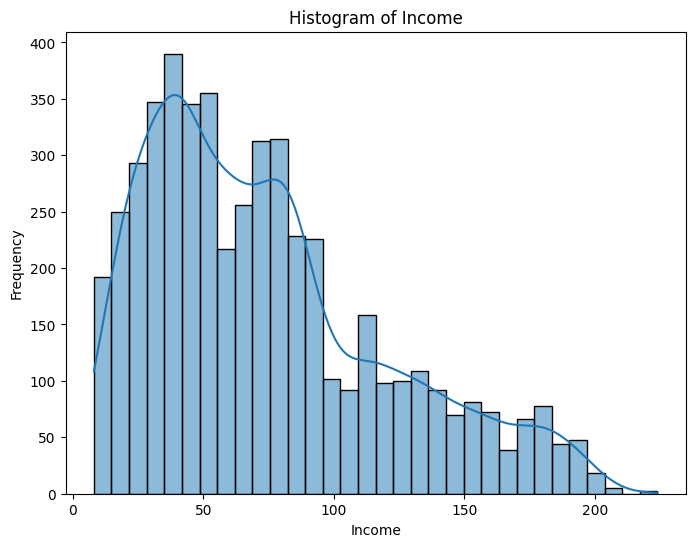

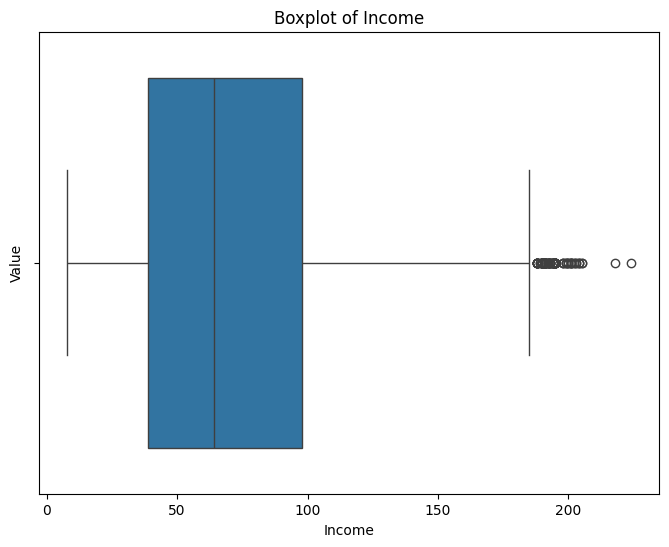

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def function_name(df, column):
    # Create a histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
function_name(loan, 'Income')
plt.show()

def function_name(df, column):
    # Create a boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Value')
function_name(loan, 'Income')
plt.show()

***Commentaire Histogramme = L'Histogramme ici montre la répartition des revenus annuel en milliers entre les 5000 individus. On peut analyser ici que
les plus grosses fréquences d'expérience situent entre 30k et 70k environ. Dans ces environs là, la variation est la plus haute. Egalement on voit des valeurs faibles (2 de fréquences avec 220k de revenus).***

Commentaire BoxPlot = Le BoxPlot ici nous en dit plus sur certaines statistiques (médiane, quartiles 25% (10k à 40k$), 50% (40k$ à 97k$), quartiles 75% 97 de fréquences et 180 de fréquences $, revenus annuel minimum, revenus annuel maximum) de ce jeu de données.

En effet, on peut voir que les revenus annuels median ici est de 65k. Que les revenus maximum sont de 185k $,

Tandis que les revenus minimum sont d'environ de 10k $ environ.
Les petits ronds à droite correspondent aux valeurs extrèmes, donc envrion 220k $ comme valeurs très élevés.
En résumé, ce boxplot nous expose la dispersion des revenus annuel des clients et leur répartition autour de la médiane.
Valeur extrème 180 à 220 milliers de $.

### Observations on Family

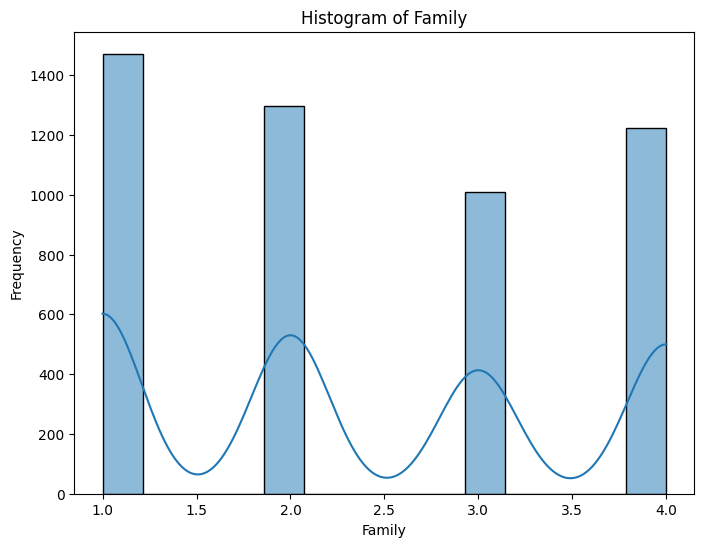

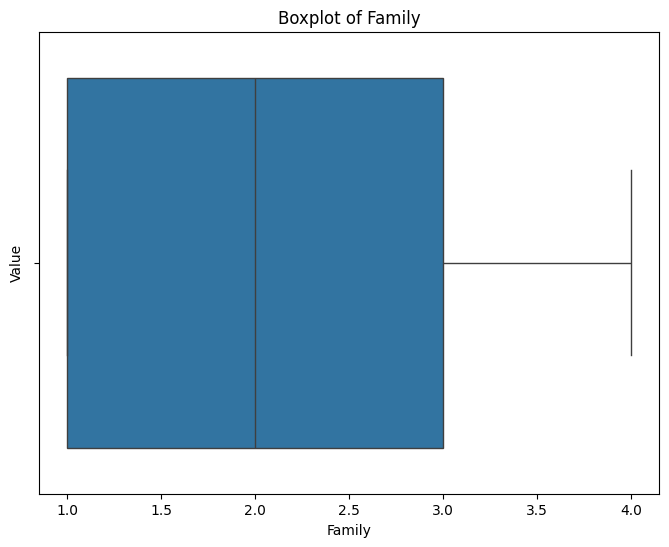

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def function_name(df, column):
    # Create a histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
function_name(loan, 'Family')
plt.show()

def function_name(df, column):
    # Create a boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Value')
function_name(loan, 'Family')
plt.show()

***Commentaire Histogramme = L'Histogramme ici montre la répartition de la taille de la famille entre les 5000 individus. On peut analyser ici que les plus grosses fréquences d'expérience situent entre 1 et 2 taille de la famille. Dans ces environs là, cette variation est la plus haute. Egalement on voit la valeur la plus faibles (3 de familles avec 1000 de fréquences).Grahphique assez spécial pour cette donée famille.***

***Commentaire BoxPlot = Le BoxPlot ici nous en dit plus sur certaines statistiques (médiane, quartiles 25%, 50% (Taille de 1 à 3), taille quartile 75% taille 3 à 4 taille famille minimum 1, taille famille maximum de 4) de ce jeu de données. En effet, on peut voir que la taille famille median ici est de 2. Que la taille de la famille sont de 4  tandis que la taille famille minimum sont d'environ de 1 environ. A première vue, il n'y a pas l'air d'avoir des  valeurs extrèmes. En résumé, ce boxplot nous expose la dispersion de la taille de la famille des clients et leur répartition autour de la médiane.***

### Observations on CCAvg

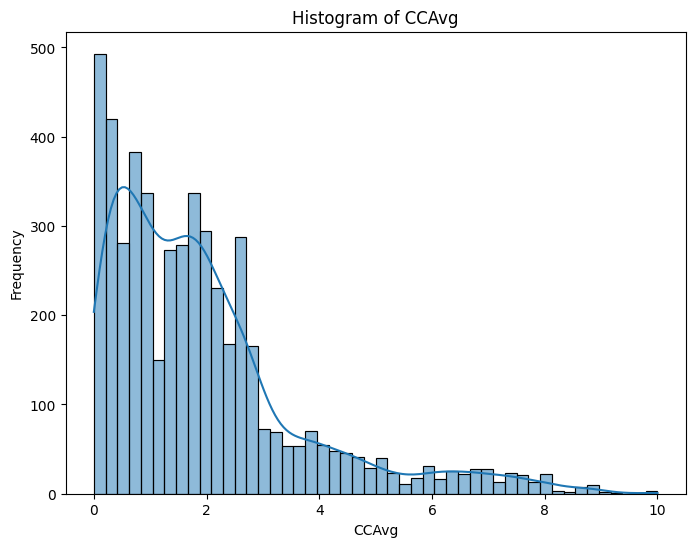

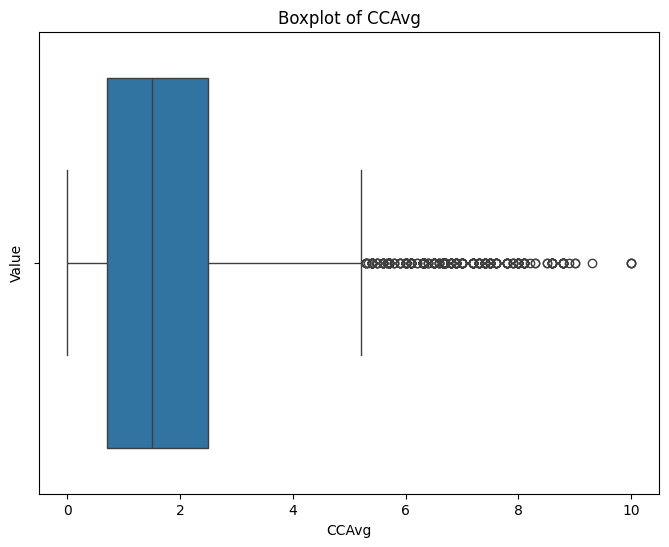

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def function_name(df, column):
    # Create a histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
function_name(loan, 'CCAvg')
plt.show()

def function_name(df, column):
    # Create a boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Value')
function_name(loan, 'CCAvg')
plt.show()

***Commentaire Histogramme = L'Histogramme ici montre la répartition des dépenses moyennes mensuel en milliers d'€ entre les 5000 individus. On peut analyser ici que les plus grosses fréquences de dépenses se situent entre 0 et 2k$ environ. Dans ces environs là, la variation est la plus haute. Egalement on voit des valeurs très élevés (1 de fréquence avec 10k de dépenses). Et la valeur la plus faible est 490 de fréquence en 1k de dépenses mensuel.***


***Commentaire BoxPlot = Le BoxPlot ici nous en dit plus sur certaines statistiques (médiane, quartiles 25% entre 0k$ et 1k$, dépenses mensuels minimum 0,dépenses maximum de 5,2k$) de ce jeu de données. ***

***En effet, on peut voir que les dépenses medians ici sont de 1.75k. A première vue, il y a des des valeurs extrèmes à partir de 5k$ jusqu'à 10k$. Ces valeurs extrèmes sont des dépenses de clients non habituel et peu commune. En résumé, ce boxplot nous expose la dispersion de la taille de la famille des clients et leur répartition autour de la médiane.***

Commentaire

### Observations on Education

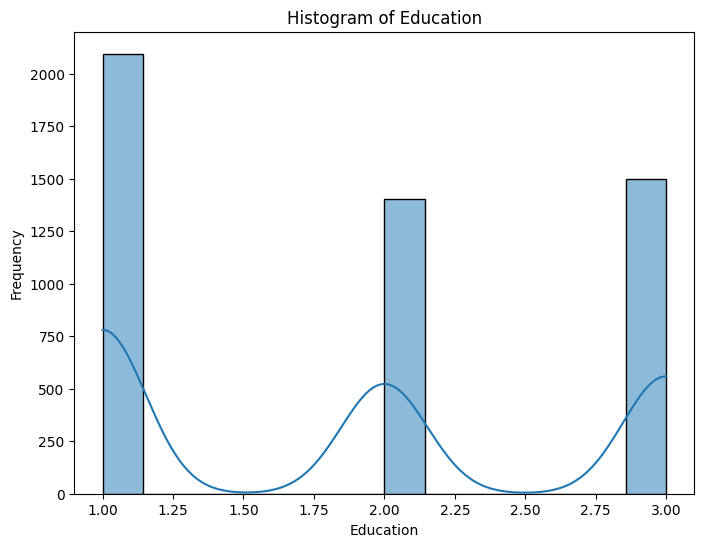

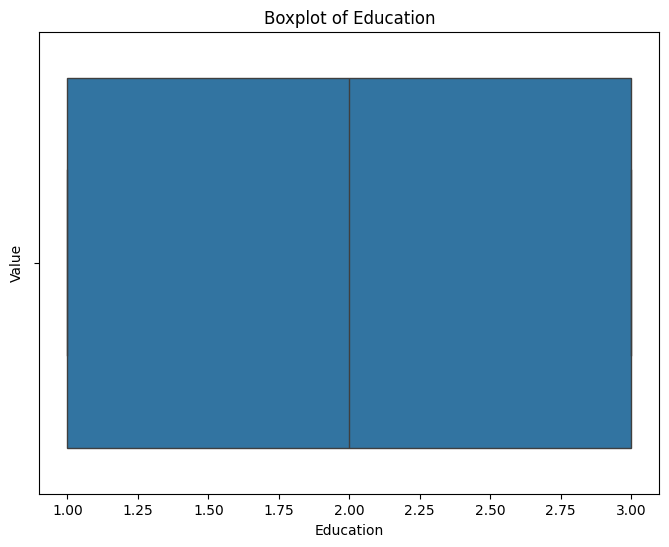

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def function_name(df, column):
    # Create a histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
function_name(loan, 'Education')
plt.show()

def function_name(df, column):
    # Create a boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Value')
function_name(loan, 'Education')
plt.show()

***Commentaire Histogramme = L'Histogramme ici montre la répartition des niveaux de diplômes scolaires et universitaires (Licence = 1) (2 : Diplôme universitaire)  (Niveau 3 : Avancé/Professionnel) entre les 5000 individus. On peut analyser ici que les plus grosses quantité de clients en termes d'études est le niveau 1 donc la Licence avec 2000 de fréquence. Dans ces environs là, la variation est la plus haute. Tandis que la valeur la plus faible est le niveau 2 avec un peu moins de 1400 de fréquences. On peut conclure que ce graphique évolue de manière catégorique.***

***Commentaire BoxPlot = Le BoxPlot ici nous en dit plus sur certaines statistiques (médiane, quartiles 25% = Niveau 1 , 50% (Niveau 2), Niveau  minimum 1, Niveau maximum de 3) de ce jeu de données. En effet, on peut voir que le niveau médian ici est de 2. Tandis que les niveaux maximums sont de 3 tandis que la taille famille minimum sont d'environ de 1 environ. A première vue, il n'y a pas l'air d'avoir des  valeurs extrèmes. En résumé, ce boxplot nous expose la dispersion du niveuax des clients et leur répartition autour de la médiane.***

### Observations on Mortgage

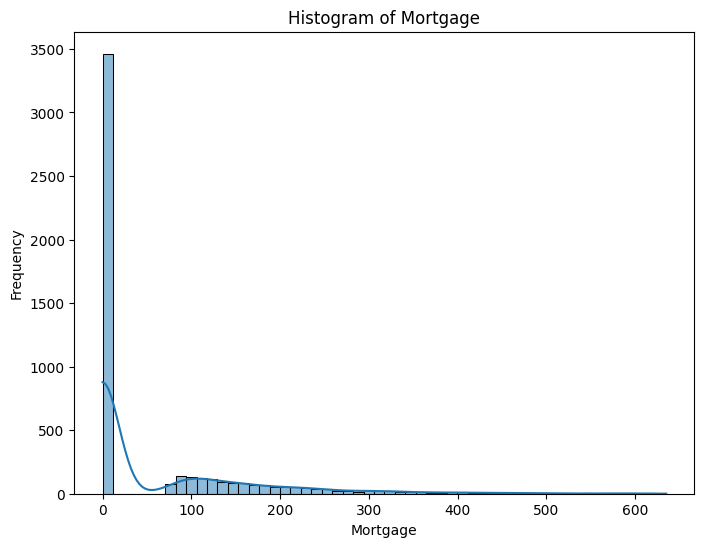

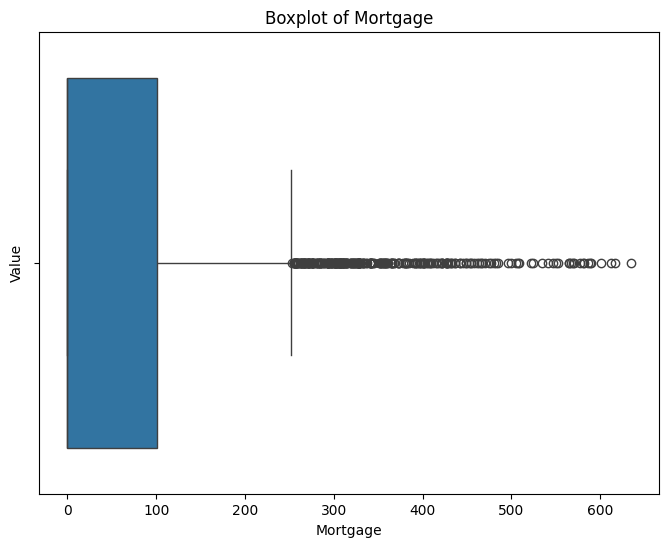

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def function_name(df, column):
    # Create a histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
function_name(loan, 'Mortgage')
plt.show()

def function_name(df, column):
    # Create a boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Value')
function_name(loan, 'Mortgage')
plt.show()

***Commentaire Histogramme = L'Histogramme ici montre la répartition de la variable hypothèque qui recense  entre les 5000 individus. On peut analyser ici que les plus grosses quantité d'hypothèque est le mortage 1 qui a une fréquence quasi 3500. Dans ces environs là, la variation est la plus haute. Tandis que la valeur la plus faible est le mortage 600 avec une fréquence de 0,1.  On peut conclure que ce graphique évolue de manière hétérogène.***

***Commentaire BoxPlot = Le BoxPlot ici nous en dit plus sur certaines statistiques (médiane, quartiles 25% = Mortage 0 , 50% = 0 de Mortage. En effet, on peut voir que le niveau médian ici est de 0. Tandis que les niveaux maximums sont de 250 tandis que la taille famille minimum sont d'environ de 0. A première vue, il y a beacoup de valeurs extrèmes. Allant de 250 à 620 de fréquence. En résumé, ce boxplot nous expose la dispersion des valeurs hytpothèque et leur répartition autour de la médiane.***

## Bivariate Analysis

Utilisez la fonction sns.heatmap et .corr de pandas pour observer les corrélations entre vos variables. (créer une fonction)

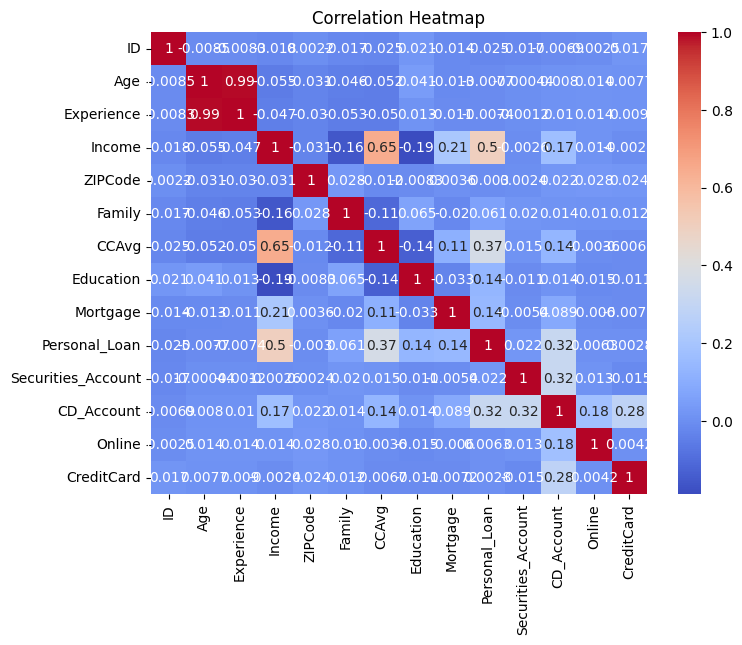

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.002240,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.030530,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.030456,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.030709,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIPCode,0.002240,-0.030530,-0.030456,-0.030709,1.000000,0.027512,-0.012188,-0.008266,0.003614,-0.002974,0.002422,0.021671,0.028317,0.024033
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.027512,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.012188,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.008266,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.003614,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal_Loan,-0.024801,-0.007726,-0.007413,0.502462,-0.002974,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [ ]:
#todo
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def function_name(df):
    # Create a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()
    return df.corr()

function_name(loan)


***Commentaire = Cette Map montre les différentes corrélations et leur degré (de rouge à bleu) entre les variables présentes dans le dataset, les corrélations fortes sont affichés en rouge. Comme corrélation forte, on peut citer l'âge et l'epérience avec une valeur de 1 et 0,99. Les valeurs évoluent presque de la même manière. Il y a aussi une corrélation modéré exemple entre income et CCAVG avec un taux de 0.65 qui signfie le lien que lorsqu'un client gagne beacoups, il utilisera beaucoup sa carte de crédit pour dépenser. On remarque aucune corrélation négative.***

Regarder les corrélations entre les variables "Age", "Experience", "Income", "ZIPCode", "Family" à l'aide de la fonction que vous venez de créer

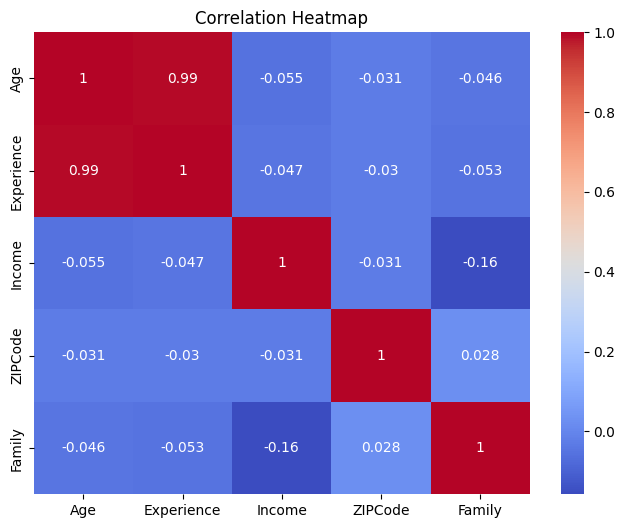

,Age,Experience,Income,ZIPCode,Family
Age,1.000000,0.994215,-0.055269,-0.030530,-0.046418
Experience,0.994215,1.000000,-0.046574,-0.030456,-0.052563
Income,-0.055269,-0.046574,1.000000,-0.030709,-0.157501
ZIPCode,-0.030530,-0.030456,-0.030709,1.000000,0.027512
Family,-0.046418,-0.052563,-0.157501,0.027512,1.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def function_name(df):
    # Create a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()
    return df.corr()
function_name(loan[['Age', 'Experience', 'Income', 'ZIPCode', 'Family']])




***Commentaire = Cette Map recense ici seulement les corréaltions des variables Age, Experience, Income, ZIPCode, et Family. Et là on peut mieux voir que age et experience ont presque atteint une corrélation parfaite avec 0.99. Alors que d'autres variables à faibles corrélation comme Income et Family, atteint un taux de 0.16. Il y a uniquement peu de relations fortes, la plupart des corrélations sont faibles.***

Utilisez la fonction pairplot (seaborns) pour observer les distributions des données

In [ ]:
#todo
sns.pairplot(loan)

***Commentaire = Ici, c'est une autre forme de représentation de variables qui sont corrélés entre elles. On peut ici que les variables age et expérience sont  corrélés et montre une sorte de diagonale. Si les données sont dispersées ou positionnés demanière alétoire, cela signifie que leur corrélation sera faible.***

Utilisez votre fonction pairplot pour les variables ["ID", "Personal_Loan", "Securities_Account", "CD_Account", "Online", "CreditCard"]

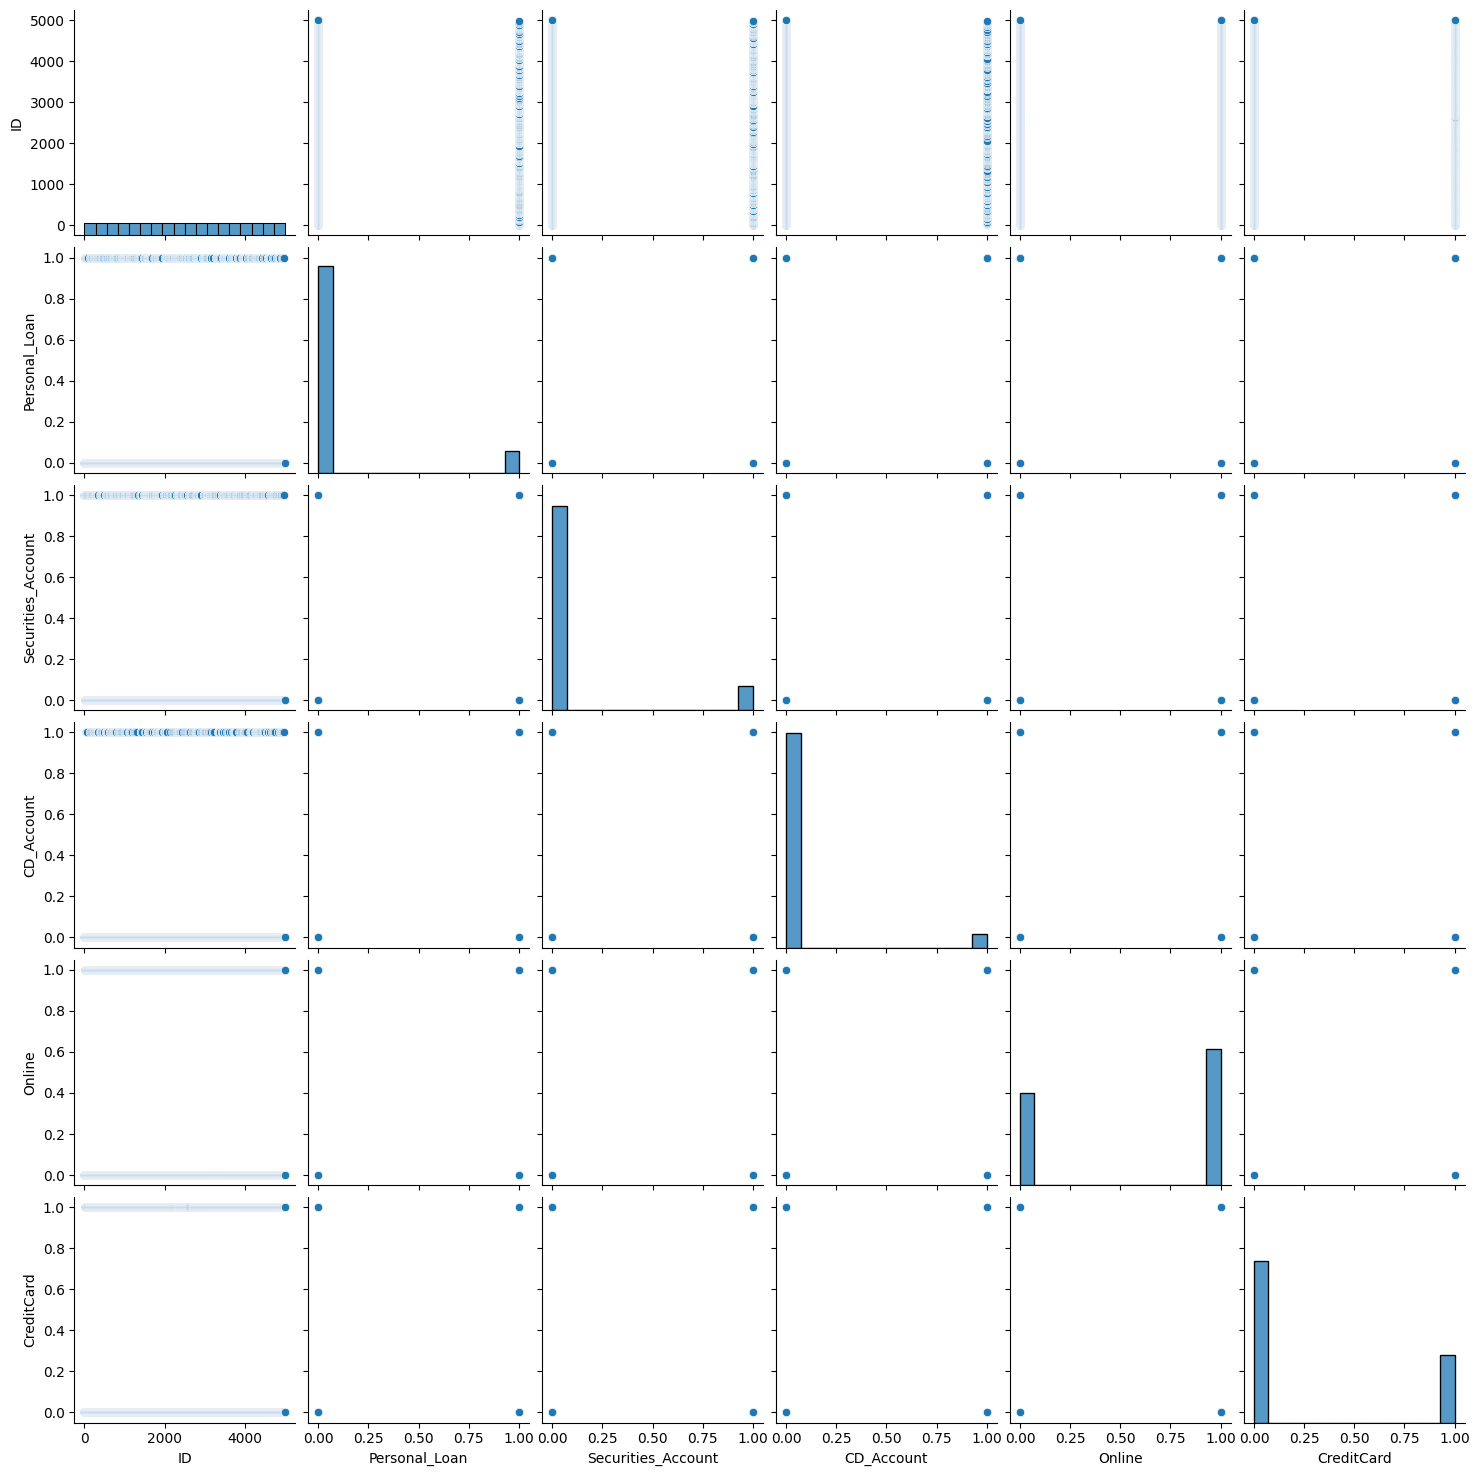

In [22]:
#todo
sns.pairplot(loan[["ID", "Personal_Loan", "Securities_Account", "CD_Account", "Online", "CreditCard"]])


***Commentaire = Ce graphique motre une réel absence decorréaltion entre les variables mise en avant, Il n'ya aucune relation claire et visible.***

### Personal loan vs income and education

Créer un fonction displot pour observer la distribution de la variable "Education" en fonction de "Personal_Loan"

<Figure size 800x600 with 0 Axes>

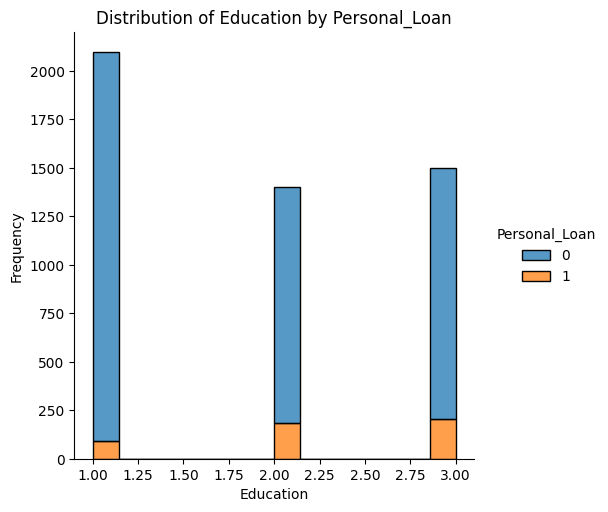

In [23]:
#todo
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
def function_name(df, x, y):
    # Create a displot
    plt.figure(figsize=(8, 6))
    sns.displot(data=df, x=x, hue=y, multiple="stack")
    plt.title(f'Distribution of {x} by {y}')
    plt.xlabel(x)
    plt.ylabel('Frequency')
function_name(loan, 'Education', 'Personal_Loan')
plt.show()

***Commentaire = Ce graphique assez attypique nous montre la distribution de la variable Education sur la variable Personnal_loan. Plus précisement si le niveau de diplôme scoalaire ou universitaire va t-il impacté l'accepation d'un prêt ou non. En bleu, ceux qui n'ont pas de pret et inversement en orange. Donc là on voit que là plupart n'ont pas accepté de prêt quel que soit leur diplôme.La variable Education n'est donc pas une variable à prendre en compte pour prédire l'acceptation d'un prêt.***

# Machine learning

## Split Data

We need to have a train and a test dataset. We will see why late.

We want to predict "Personal_Loan" feature. So,

x = all features exept of Personal_Loan

y = Personal_Loan

In [24]:
#too
x = loan.loc[:, loan.columns != "Personal_Loan"]   #Le Tableau contient toutes les données sauf Personnal_Loan qui est à prédire
y = loan["Personal_Loan"] #Ici Seul Personnal_loan est contenu
x

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0


On veut maintenant split les données entre train, test et validation, utilisez train_test_split de sklearn.

In [25]:
# TODO :
import sklearn as sk
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x, y)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred= model.predict(X_val)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, pred)

array([[1103,   22],
       [  11,  114]])

In [26]:
# Test, you should have 3500 / 1500
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)


(3750, 13)
(1250, 13)
(3750,)
(1250,)


In [27]:
print(y_train.value_counts())
print(y_val.value_counts())


Personal_Loan
0    3395
1     355
Name: count, dtype: int64
Personal_Loan
0    1125
1     125
Name: count, dtype: int64


Le dataset est il équilibré ? #todo

***Le DataSet ici n'est pas équilibré car il y a majortairement de 0 (1141 0 et 109  1) et peu de 1. Ce qui peut poser des problèmes sur les prédictions avenirs.***

Critère d’évaluation du modèle

Le modèle peut faire des prédictions erronées de la manière suivante :

	1.	Prédire qu’un client souscrira un prêt alors qu’en réalité le client ne le fera pas. - Perte de ressources
	2.	Prédire qu’un client ne souscrira pas un prêt alors qu’en réalité le client le ferait. - Perte d’opportunité

Quel cas est le plus important ?

Nous voulons maximiser les profits, donc nous devons réduire le nombre de prédictions indiquant qu’un client souscrira un prêt alors qu’en réalité, il ne le fera pas.

Comment réduire cette perte, c’est-à-dire réduire les faux négatifs ?

Le rappel (recall) doit être maximisé : plus le rappel est élevé, plus les chances de minimiser les faux négatifs augmentent.

D’abord, créons des fonctions pour calculer différentes métriques et la matrice de confusion afin de ne pas avoir à répéter le même code pour chaque modèle.

Créez la fonction get_recall_score sera utilisée pour vérifier les performances des modèles.

In [28]:
##  Function to calculate recall score
def recall_score(y_true, y_pred):
    from sklearn.metrics import recall_score
    return recall_score(y_true, y_pred)

def get_recall_score(y_true, y_pred):
    return recall_score(y_true, y_pred)

get_recall_score(y_val, pred)


0.912

***Ceci est un bon score performant, mais peut mieux faire car il reste 11% de faux de négatifs à remedier.***



In [29]:
def confusion_matrix_sklearn(model, predictors, target):
    from sklearn.metrics import confusion_matrix
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    return cm
confusion_matrix_sklearn(model, X_val, y_val)


array([[1103,   22],
       [  11,  114]])

***Voici la matrice de confusion, cela nous montre si le modèle a fait de bonnes prédictions ou non. On peut voir ici, que le modèle a correctement prédit que ces clients n'ont pas fait de pret (1131) et que ces clients ont bien fait un prêt avec la valeur (98). Il a fait des erreurs avec 10 faux positifs et 11 faux négatifs. Le modèle peut s'améliorer.***

## Construire un modèle d’arbre de décision

•	Nous construirons notre modèle en utilisant la fonction DecisionTreeClassifier, avec le critère par défaut ‘gini’ pour le découpage.
•	Si la fréquence de la classe 0 est d’environ 90 % et celle de la classe 1 d’environ 10 %, alors la classe 0 deviendra dominante et l’arbre de décision sera biaisé en faveur de cette classe dominante.
•	Dans ce cas, nous pouvons passer un dictionnaire “balanced” au modèle pour spécifier le poids de chaque classe, et l’arbre de décision donnera le même poids à chaque classe.
•	class_weight est un hyperparamètre pour le classificateur d’arbre de décision.

maintenant, nous devons “ajuster” le modèle, ce qui signifie l’entraîner : utilisez la fonction .fit()

In [30]:
# now, we have to "fit" the model, it means to train it : use .fit() function
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(class_weight="balanced")
model.fit(X_train, y_train)



DecisionTreeClassifier(class_weight='balanced')

***Le modèle s'ajuste pour prendre en compte les 1 pour ainsi éviter que la classe 0 domine.***

#### Checking model performance on training set
Use confusion_matrix_sklearn function on **training** set

In [31]:
# Use confusion_matrix_sklearn function on training set
confusion_matrix_sklearn(model, X_train, y_train)

array([[3395,    0],
       [   0,  355]])

***On aperçoit qu'il n'y a 0 erreurs car c'est un modèle qu'il connait. 0 faux positifs et 0 faux négatifs.***

In [32]:
# TODO: Calculate recall with get_recall_score() and describe
get_recall_score(y_train, model.predict(X_train))

1.0

***Logiquement étant donné qu'il a eu 0 erreurs avec 0 faux positifs et 0 faux négatifs, il a réussi à prédire tout les données. Le résultat 1 est très performant, c'est le plus haut résultat qu'on peut avoir. 100% prédiction réussi.***

#### Checking model performance on test set


In [33]:
# Use confusion_matrix_sklearn on test set. Calculate recall. Then describe.
confusion_matrix_sklearn(model, X_val, y_val)

array([[1106,   19],
       [  15,  110]])

In [34]:
# Use get_recall_score
get_recall_score(y_val, model.predict(X_val))

0.88

***Commentaire = Ici on a testé le modèle sur les données test. Et on peut voir la matrice de confusion et juste en bas le score recall. La Matrice de confusion recense 1135 vrais négatifs, 97 vrais positifs, 6 faux positifs, 12 faux négatifs. Des erreurs ont été faite mais cela est améliorable. Après le score de 0.89 est performant, il détecte 89% des clients intéréssés par un prêt. Le modèle peut encore être améliorer.***

## Visualizing the Decision Tree

In [35]:
## creating a list of column names
feature_names = X_train.columns.to_list()

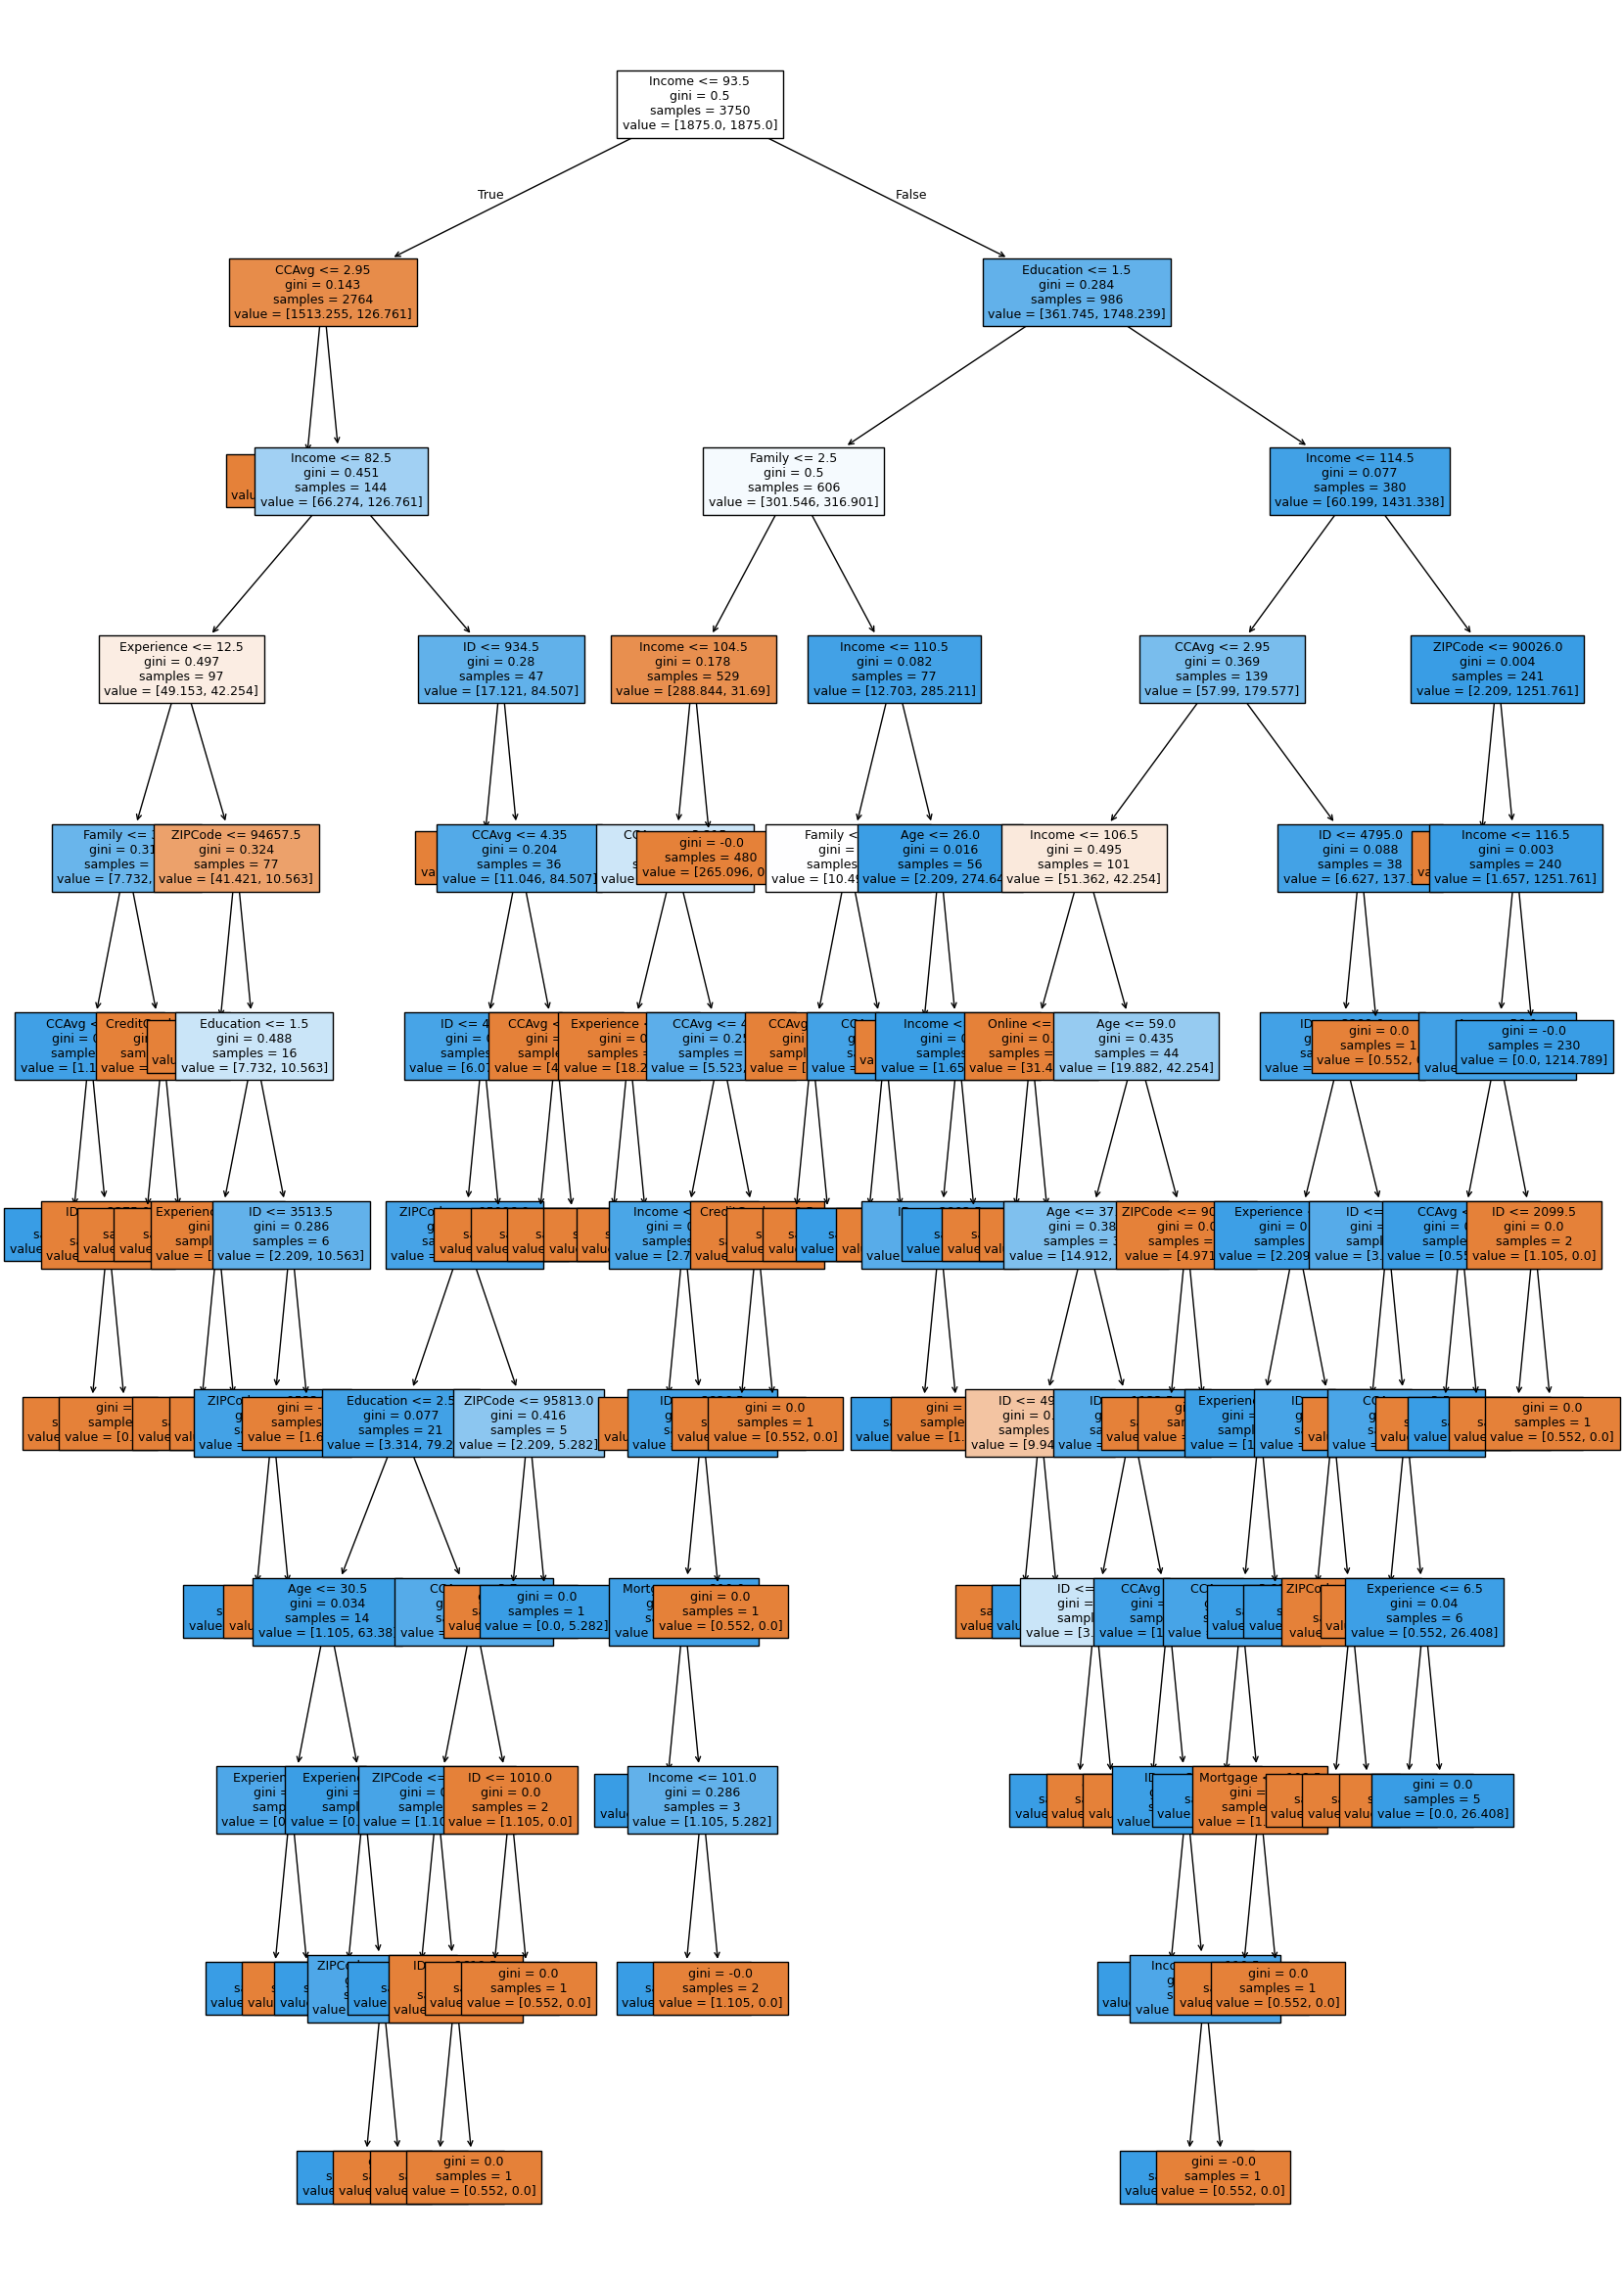

In [36]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

***Commentaire = Voici l'arbre de décision qui divise tout cela en plusieurs niveaux selon les colonnes des data set. A chaque niveau, il divise les données selon la réponse oui ou non aux questions. Les boites finales donnent la décision finales. C'est un modèle qui est utile pour faire des prédictions.***

In [37]:
# Text report showing the rules of a decision tree -
print(tree.export_text(model, feature_names=feature_names, show_weights=True))


|--- Income <= 93.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1446.98, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 82.50
|   |   |   |--- Experience <= 12.50
|   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |--- CCAvg <= 3.50
|   |   |   |   |   |   |--- weights: [0.00, 31.69] class: 1
|   |   |   |   |   |--- CCAvg >  3.50
|   |   |   |   |   |   |--- ID <= 3275.00
|   |   |   |   |   |   |   |--- weights: [0.55, 0.00] class: 0
|   |   |   |   |   |   |--- ID >  3275.00
|   |   |   |   |   |   |   |--- weights: [0.55, 0.00] class: 0
|   |   |   |   |--- Family >  3.50
|   |   |   |   |   |--- CreditCard <= 0.50
|   |   |   |   |   |   |--- weights: [5.52, 0.00] class: 0
|   |   |   |   |   |--- CreditCard >  0.50
|   |   |   |   |   |   |--- weights: [1.10, 0.00] class: 0
|   |   |   |--- Experience >  12.50
|   |   |   |   |--- ZIPCode <= 94657.50
|   |   |   |   |   |--- weights: [33.69, 0.00] class: 0
|   |   |   |   |--- ZIPCode >  94657.50
|   |   |  

***Commentaire = Cette représentation décrit simplement les règles de l'arbre de décision juste au dessus, chaque ligne représente un critère (ou une question) pour filtrer les données. Ce format de représentation est utile car il nous montre les décisions du modèle.***

In [43]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                             Imp
Income              6.091890e-01
Family              1.319318e-01
CCAvg               1.162731e-01
Education           9.624919e-02
ID                  1.935924e-02
Experience          9.896530e-03
ZIPCode             9.134903e-03
Age                 7.802043e-03
Mortgage            1.640985e-04
Online              2.236797e-17
CreditCard          1.693949e-17
Securities_Account  0.000000e+00
CD_Account          0.000000e+00


***Commentaire = Ce tableau classe les variables des colonnes des plus importantes au moins importantes pour le modèle d'arbre de décision. Il les trie selon leur impact sur le modèle. Ce codeva nous permettre de comprendre quel données il utilise le plus pour ces prédictions.***

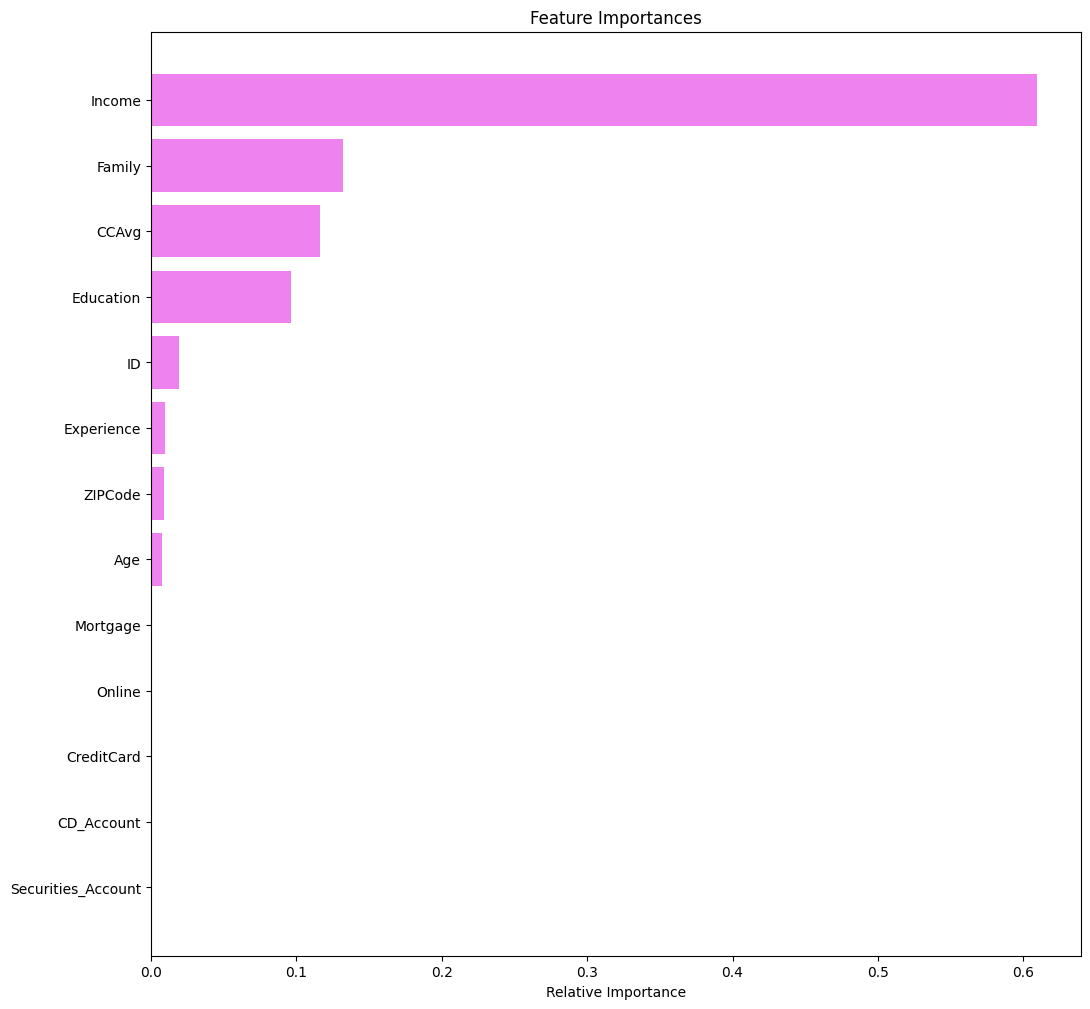

In [46]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

***Commentaire = Ce graphique nous expose l'importance des différentes variables trié, du modèle pour faire des prédictions. En particulier, la prédiction qui va permettre de savoir si un client va accepter de faire un prêt ou non. On peut voir que Income est la variable la plus importante (income = revenus annuel). On peut voir ici quels sont les données qui impact les décisions du modèle précédent.***

### Reducing over fitting

#### Using GridSearch for Hyperparameter tuning of our tree model

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [58]:
import sklearn
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": [3,4, 5, 10],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3,
                       min_impurity_decrease=0.01, random_state=1)

***Commentaire = Ce code nous montre que pour cette situation le meilleur modèle serait d'utiliser le modèle DecisionTreeClassifier avec les paramètres décrits dans le résultat. Il offre de très bonne performance pour faire de très bonne prédictions.***

#### Checking performance on training set

In [53]:
# TODO: confusion_matrix_sklearn
confusion_matrix_sklearn(estimator, X_train, y_train)

array([[3143,  252],
       [   6,  349]])

In [56]:
# TODO: get_recall_score
get_recall_score(y_train, estimator.predict(X_train))

0.9830985915492958

Concernant la matrice de confusion du jeu de données d'entrainement, le modèle a bien placé 3143 données de 0, 349 données de 1. Cependant, il y a des erreurs comme les 252 faux positifs, et les 6 faux négatifs.

***Commenntaire = Puis concernant la fonction get_recall_score, celle-ci donne un score très bond 0.98, c'est un score performant. Il est quasiment parfait mais il reste 0,17 % d'erreurs. Il prédit la majorité des données d'entrainement.***

#### Checking performance on test set

In [59]:
# TODO: confusion_matrix_sklearn
confusion_matrix_sklearn(estimator, X_val, y_val)


array([[1033,   92],
       [   0,  125]])

In [61]:
# TODO: get_recall_score
get_recall_score(y_val, estimator.predict(X_val))


1.0

***Commentaire = Résultat parfait, 100% des prédictions.***

* The model is giving a generalized result now, and is really close to the train_set recall value.

## Visualizing the Decision Tree

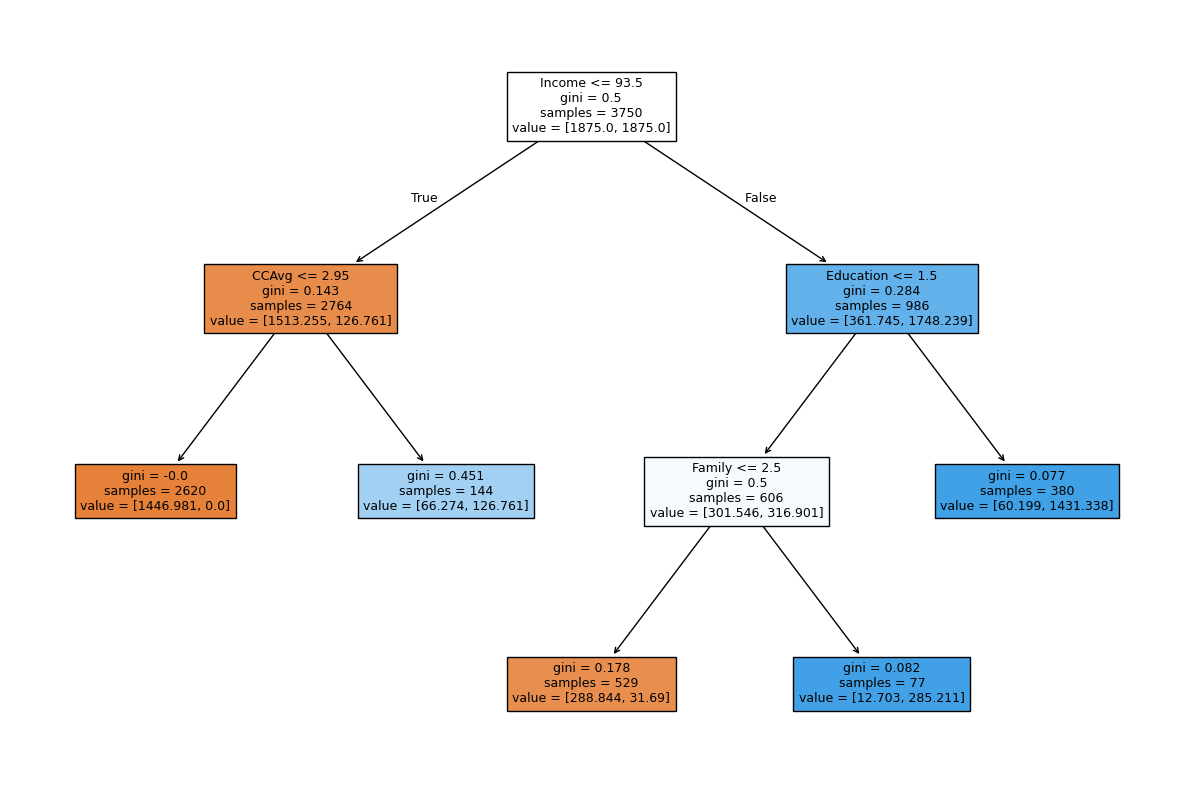

In [62]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [64]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 93.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1446.98, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [66.27, 126.76] class: 1
|--- Income >  93.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [288.84, 31.69] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [12.70, 285.21] class: 1
|   |--- Education >  1.50
|   |   |--- weights: [60.20, 1431.34] class: 1



***Voici une meilleur représentation de l'arbre de décision. Ceci est plus facile et intuitif à comprendre.***

**Observations from the tree:**

Using the above extracted decision rules we can make interpretations from the decision tree model like:

* If a client have xxx

In [65]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

                         Imp
Income              0.654703
Family              0.143054
Education           0.109920
CCAvg               0.092323
ID                  0.000000
Age                 0.000000
Experience          0.000000
ZIPCode             0.000000
Mortgage            0.000000
Securities_Account  0.000000
CD_Account          0.000000
Online              0.000000
CreditCard          0.000000


***Commentaire = Cela nous met en avant l'organisation des valeurs les plus importantes et variables qui auront le plus d'influennce.***

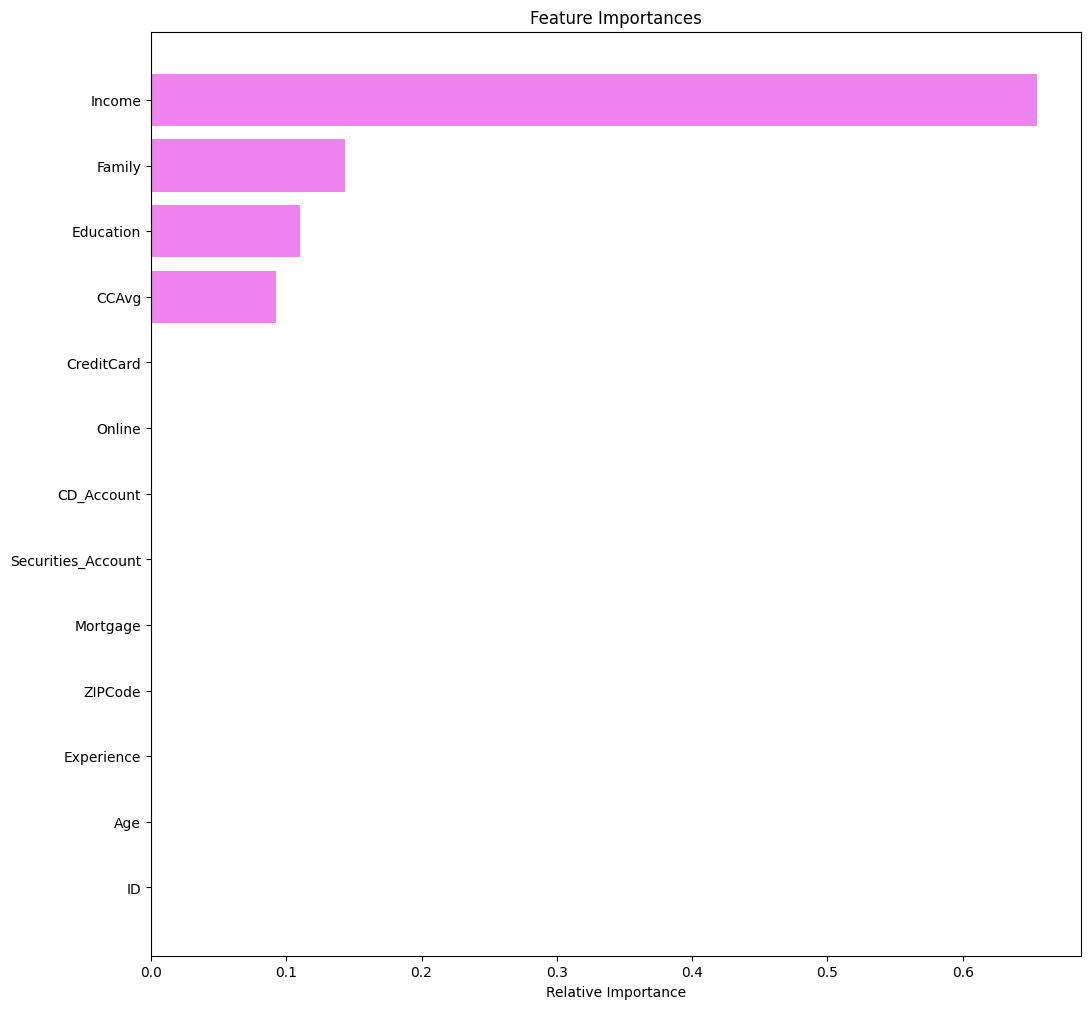

In [66]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* xxx

***Commentaire = Ce graphique nous montre un graphique horizontal des données d'entreprise d'un apprentissage automatique, les plus majoritaires. Il les a classé selon leur d'importance et d'influence. ***

***Les titres et laels sont ajoutés pour une meilleur compréhension du graphique.***